# Introduction to Data Science 2025

# Bonus exercises

## Exercise 1: EDA of unemployed highly educated people in Finland

In this assignment, you will explore time series data on unemployment of highly educated people in Finland combined with two datasets of your own choosing. The idea of the assignment is to look into how the unemployed highly educated population varies over time and across different areas by using the data wrangling, exploratory data analysis, and visualization tools discussed during the course.

First, please download the Statistics Finland's CSV dataset (available in the course MOOC Materials) that contains data on employment and unemployment numbers grouped by level of education, province, and year.

Read in the data to a data frame, and have a look at the rows and columns it contains. For ease of use, you can set the year column as the index. Perform any other preprocessing you see fit. If you are working in Python, you can do this using the pandas library. 

**Hint**: you can also create new useful columns using the existing ones. 

In [11]:
## Use this cell for your code

import pandas as pd 

data = pd.read_csv("unemployment_data.csv", encoding="ISO-8859-1")
print(data.head())
print(data.info())
print(data.isnull().sum())

data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")
data['year'] = data['year'].astype(int)
data = data.set_index('year')

highly_educated = data[data['level_of_education'].str.contains("Master", case=False, na=False)]
print(highly_educated.head())


pivot = highly_educated.pivot_table(index=['year', 'area'],columns='main_type_of_activity',values='population_31_dec',aggfunc='sum').reset_index()
pivot.columns.name = None
pivot = pivot.rename(columns={'Employed': 'employed_high_edu','Unemployed': 'unemployed_high_edu','Total': 'total_high_edu'})
pivot['unemployment_rate_high_edu'] = (pivot['unemployed_high_edu']/pivot['total_high_edu']*100)
print(pivot.head())







   Year          Area Main type of activity  \
0  1987  MK01 Uusimaa                 Total   
1  1987  MK01 Uusimaa                 Total   
2  1987  MK01 Uusimaa              Employed   
3  1987  MK01 Uusimaa              Employed   
4  1987  MK01 Uusimaa            Unemployed   

                                  Level of education  Population 31 Dec  
0                                              Total            1199530  
1  7-8 Master's or equivalent level or doctoral o...              65757  
2                                              Total             653347  
3  7-8 Master's or equivalent level or doctoral o...              55702  
4                                              Total              13998  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   4218 non-null   int64 
 1   Area     

Next, find two time series datasets of your choice to combine with the unemployment data. These can be time series data on factors that you are interested in that might be connected to unemployment, and should cover at least some of the same years as the unemployment data. Please find the datasets from some source other than Statistics Finland (Tilastokeskus).

Read in your datasets, perform any necessary cleaning (such as handling missing values or removing unnecessary columns, et cetera). Preprocess the data so that the features are presented on a yearly level. Then, combine the preprocessed datasets to the unemployment data using the year column to link the datasets.

In [12]:
## Use this cell for your code


inflation = pd.read_csv("unemployment_data2.csv", encoding="ISO-8859-1")
print(inflation.head())
print(inflation.info())


inflation = inflation[["REF_AREA", "Reference area", "TIME_PERIOD", "OBS_VALUE"]]
inflation.columns = ["country_code", "country", "time_period", "inflation_rate"]
inflation["year"] = pd.to_datetime(inflation["time_period"], errors="coerce").dt.year
inflation["inflation_rate"] = pd.to_numeric(inflation["inflation_rate"], errors="coerce")
print(inflation.head())

inflation_yearly = (inflation.groupby(["country", "year"])["inflation_rate"].mean().reset_index())
print(inflation_yearly.head())

combined = pd.merge(pivot, inflation_yearly, on="year", how="left")
combined["inflation_rate"] = combined["inflation_rate"].interpolate()
print(combined.info())




  STRUCTURE                                STRUCTURE_ID  \
0  DATAFLOW  OECD.SDD.TPS:DSD_PRICES@DF_PRICES_ALL(1.0)   
1  DATAFLOW  OECD.SDD.TPS:DSD_PRICES@DF_PRICES_ALL(1.0)   
2  DATAFLOW  OECD.SDD.TPS:DSD_PRICES@DF_PRICES_ALL(1.0)   
3  DATAFLOW  OECD.SDD.TPS:DSD_PRICES@DF_PRICES_ALL(1.0)   
4  DATAFLOW  OECD.SDD.TPS:DSD_PRICES@DF_PRICES_ALL(1.0)   

                                      STRUCTURE_NAME ACTION REF_AREA  \
0  Consumer price indices (CPIs, HICPs), COICOP 1999      I      CHE   
1  Consumer price indices (CPIs, HICPs), COICOP 1999      I      CHE   
2  Consumer price indices (CPIs, HICPs), COICOP 1999      I      CHE   
3  Consumer price indices (CPIs, HICPs), COICOP 1999      I      CHE   
4  Consumer price indices (CPIs, HICPs), COICOP 1999      I      CHE   

  Reference area FREQ Frequency of observation METHODOLOGY Methodology  ...  \
0    Switzerland    M                  Monthly           N    National  ...   
1    Switzerland    M                  Monthly        

Perform exploratory data analysis on your merged dataset. You can use methods of your choice to compute useful statistics on the data, and to visualize different features and the interactions between them. Focus on the question of whether high education level (Master's level) and other factors in your merged dataset are associated with unemployment.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        3591 non-null   int32  
 1   area                        3591 non-null   object 
 2   employed_high_edu           3591 non-null   int64  
 3   total_high_edu              3591 non-null   int64  
 4   unemployed_high_edu         3591 non-null   int64  
 5   unemployment_rate_high_edu  3591 non-null   float64
 6   country                     2945 non-null   object 
 7   inflation_rate              2945 non-null   float64
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 210.5+ KB
None
              year  employed_high_edu  total_high_edu  unemployed_high_edu  \
count  3591.000000        3591.000000     3591.000000          3591.000000   
mean   2018.656085       20601.126149    27391.129212           915.710944   
std       8

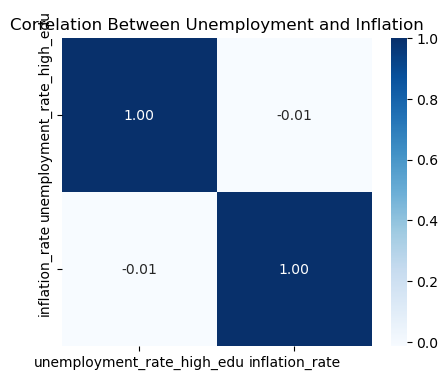

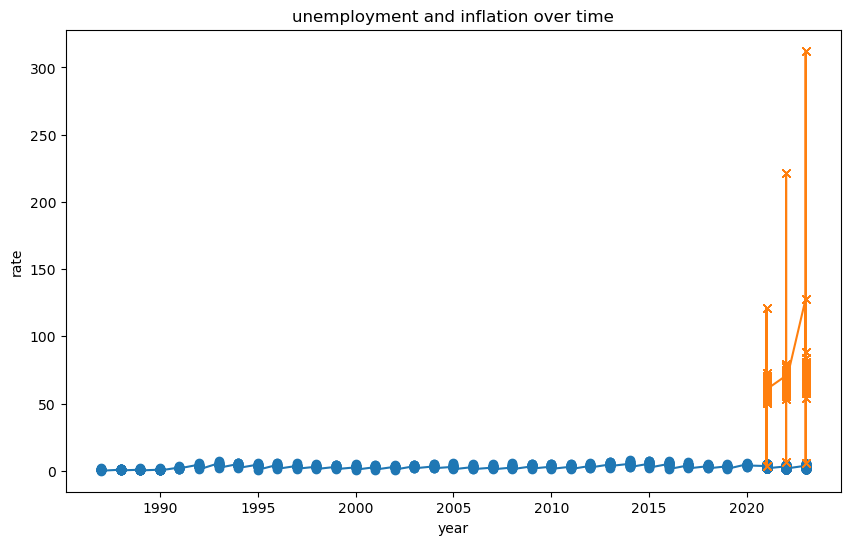

In [ ]:
## Use this cell for your code
import matplotlib.pyplot as plt

print(combined.info())
print(combined.describe())
print(combined.isnull().sum())


corr = combined[["unemployment_rate_high_edu", "inflation_rate"]].corr()
print(corr)

plt.figure(figsize=(10,6))
plt.plot(combined["year"], combined["unemployment_rate_high_edu"], label="highly educated", marker='o')
plt.plot(combined["year"], combined["inflation_rate"], label="inflation rate", marker='x')
plt.title("unemployment and inflation over time")
plt.xlabel("year")
plt.ylabel("rate")
plt.show()

Create a geographical or other type of plot showcasing the trends in the unemployment of highly educated people across different provinces over time. Compare the provinces based on your plot.

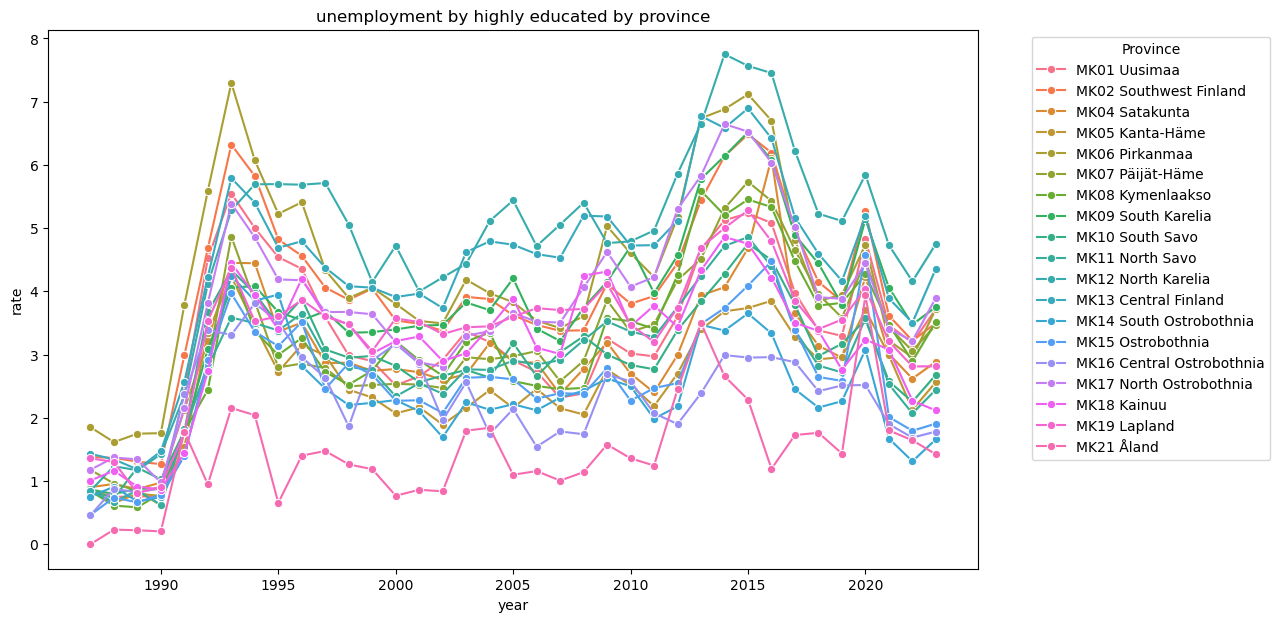

In [18]:
## Use this cell for your code

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.lineplot(data=combined,x="year",y="unemployment_rate_high_edu",hue="area", marker="o")

plt.title("unemployment by highly educated by province")
plt.xlabel("year")
plt.ylabel("rate")
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Reflect briefly on your findings. For example, which features seemed interesting with respect to changes in unemployment among the highly educated population? How do different provinces compare? What should be done to ensure that the number of unemployed highly educated people can be compared fairly across years and provinces? 

**Hint**: should we look at the raw numbers or maybe consider them relative to something else?

# Uusimaa consistently has moderate but stable unemployment rates—reflecting the resilience of the Helsinki metropolitan labor market.
# Lapland and Kainuu show high unemployment
# Aland shows very low but stable employment

# some provinces are more suspeptile for inflation
# 1995 and 2015 showed the highest unemployment rate

## Exercise 2: AI Act

In this exercise, we ask you to think about the different AI services you come accross in your daily life and consider them in terms of the AI Act's risk pyramid.

1. Brainstorm & List: For 48 hours, keep a log of every application, software, or service you interact with that you suspect uses AI. Think about social media feeds, recommendation engines (Netflix, Spotify, Amazon), grammar checkers, spam filters, navigation apps, and virtual assistants. We'd expect that most of you will be able to identify at least 10 examples.

2. Select & Analyze: Choose three distinct AI systems from your list. For each one, research and describe its primary function and how AI is used to achieve it.

3. Classify the Risk: Using the AI Act's risk pyramid as a guide, classify each of your three chosen AI systems into one of the four categories:
	- Unacceptable Risk: Is the AI system doing something that is explicitly banned (e.g., social scoring, real-time remote biometric identification in public spaces by law enforcement)?
	- High-Risk: Could the system have a significant impact on your safety, fundamental rights, or access to essential services? (e.g., AI used in educational scoring, recruitment, or credit scoring). Justify why it falls into a specific high-risk category listed in Annex III of the Act.
	- Limited or Minimal Risk: Does the system interact with you in a way that should require transparency? (e.g., chatbots, deepfakes, generative AI).

4. Justify Your Reasoning: For each classification, write a short paragraph explaining your decision, referencing specific criteria from the AI Act.

In [19]:
# 1. Gmail spam filter, TikTok social feed, linkedjobs, online language translation, spotify music suggestions and youtube videos. 
# 2. - Netflix recommends new series based on previous viewing history, machine learning algorithm to predict ratings and preferences.
#    - Grammarly detects language using Natural Language Processing NLP to detect errors, corrections and uses its own machine learning approaches to give a better version of a written template
#    - Luototiedot also shows statistics who is reliable for giving or renting an apartment, or giving loands.

# 3. - Netflix doesnt show the users on how the data is handled for recommending people new series
#    - Grammarly doesnt have transparency nor does it need to show how AI is being used since no personal data is given, unless someone delibaretly puts someone elses data there malicously, which is then reported and handled accordingly to GPDR
#   - Luototiedod or Kela can use information to classify people based on race or mental health which makes it a high risk for GPDR violations


# 4. -Netflix recommendations shouldnt be violating rights whenever recommending something - harm is minimal
#    -Grammarly does not violate any GPDR rights - no harm
#    - Goverment based informational data like Kela needs strict governence, auditing and transparency measures to prevent discrimination